# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


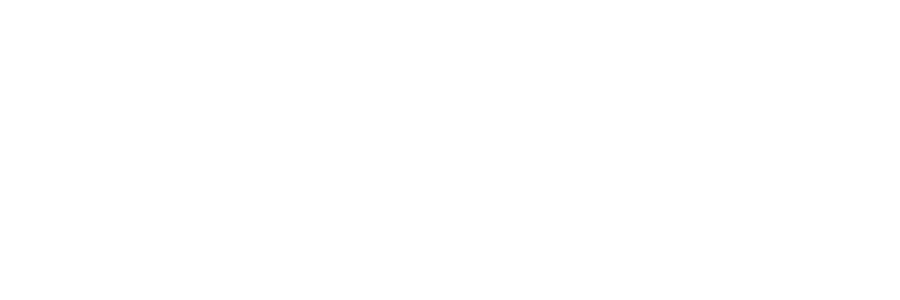

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons, Slider
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np

In [3]:
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

distributions = {'Normal': x1, 'Gamma': x2, 'Exponecial': x3, 'Uniform': x4}
initialBins = 10

<IPython.core.display.Javascript object>


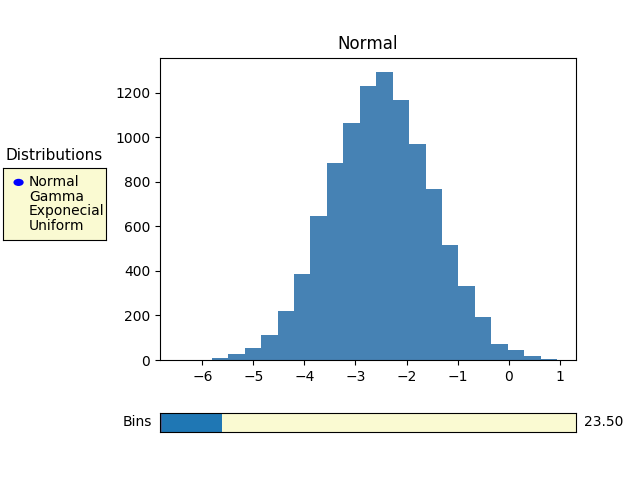

In [4]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

In [5]:
ax.hist(x1, color='steelblue', bins=initialBins)
plt.title('Normal')

In [6]:
title = {'Normal': 'Normal', 'Gamma': 'Gamma', 'Exponecial': 'Exponecial', 'Uniform': 'Uniform'}

In [7]:
axcolor = 'lightgoldenrodyellow'
axslider = plt.axes([0.25, 0.1, 0.65, 0.04], facecolor=axcolor)
slider = Slider(axslider, 'Bins', 10, 100, valinit=initialBins)

In [8]:
def update(val):
    dist = radio.value_selected
    ax.cla()
    ax.hist(distributions[dist], color='steelblue', bins=int(slider.val))
    ax.set_title(title[dist])

slider.on_changed(update)

0

In [9]:
axbutton = plt.axes([0.005, 0.5, 0.16, 0.15], facecolor=axcolor)
plt.title('Distributions', fontsize=11)
radio = RadioButtons(axbutton, ('Normal', 'Gamma', 'Exponecial', 'Uniform'), active=0)

In [10]:
def chooseDistribution(action):
    ax.cla()
    slider.reset()
    ax.hist(distributions[action], color='steelblue', bins=initialBins)
    ax.set_title(title[action])
    
radio.on_clicked(chooseDistribution)

0